In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import cv2
import tensorflow as tf

In [28]:
# print  the datasets
print(os.listdir("/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/"))
print(os.listdir("/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/"))
print(os.listdir("/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/"))

['WithoutMask', 'WithMask']
['WithoutMask', 'WithMask']
['WithoutMask', 'WithMask']


In [29]:
# Number of images in the dataset
print('Images in the training dataset:\n')
print("Mask Images count - ", len(os.listdir("/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask")))
print("Non Mask Images count - ", len(os.listdir("/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask")))

Images in the training dataset:

Mask Images count -  5000
Non Mask Images count -  5000


In [30]:
train_dir = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/"
val_dir = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/"
test_dir = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/"

### Visualization

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/5511.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2664.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2539.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1231.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2437.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_850_3888270.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_348_5679704.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_684_3026577.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_640_6283500.p

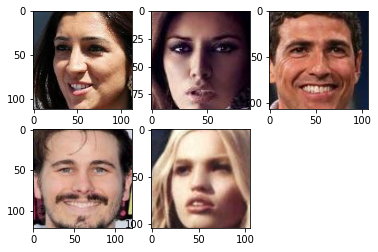

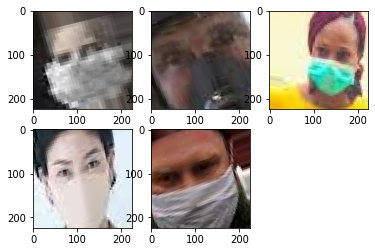

In [31]:
directory=os.listdir('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train')
for each in directory:
    plt.figure()
    currentFolder = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/'+ each
    print(currentFolder)
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = currentFolder + "/" + file
        print(fullpath)
        img=mpimg.imread(fullpath)
        plt.subplot(2,3 , i+1)
        plt.imshow(img)

### Preprocessing - Image data Generator

In [32]:
HEIGHT = 150
WEIGHT = 150

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                         zoom_range=0.2,
                                         shear_range=0.2,
                                         rotation_range=0.2)

validation_datagen = ImageDataGenerator(rescale=1./255,
                                         zoom_range=0.2,
                                         shear_range=0.2,
                                        rotation_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(directory=train_dir,
                                          target_size=(HEIGHT,WEIGHT),
                                          class_mode="categorical",
                                          batch_size=64
                                          )

val = validation_datagen.flow_from_directory(directory=val_dir,
                                            target_size=(HEIGHT,WEIGHT),
                                            class_mode="categorical",
                                            batch_size=64)

test = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(HEIGHT,WEIGHT),
                                            class_mode="categorical",
                                            batch_size=64)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


### Model

In [33]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
mobilenet = MobileNetV2(weights = "imagenet",include_top = False,input_shape=(150,150,3))

for layer in mobilenet.layers:
    layer.trainable = False

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,GlobalAveragePooling2D,Dropout

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(300, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               384300    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

In [35]:
# compile the model

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")


In [36]:
history = model.fit(train,
                              validation_data=val,
                              steps_per_epoch=len(train)//64,
                              epochs=30,
                              validation_steps=len(val)//64,
                              verbose=2)

Epoch 1/30
2/2 - 6s - loss: 1.1056 - accuracy: 0.5312
Epoch 2/30
2/2 - 2s - loss: 0.4806 - accuracy: 0.7969
Epoch 3/30
2/2 - 2s - loss: 0.3100 - accuracy: 0.8906
Epoch 4/30
2/2 - 2s - loss: 0.3897 - accuracy: 0.8359
Epoch 5/30
2/2 - 2s - loss: 0.2840 - accuracy: 0.8984
Epoch 6/30
2/2 - 2s - loss: 0.2735 - accuracy: 0.9062
Epoch 7/30
2/2 - 3s - loss: 0.1729 - accuracy: 0.9219
Epoch 8/30
2/2 - 2s - loss: 0.1944 - accuracy: 0.9531
Epoch 9/30
2/2 - 2s - loss: 0.1817 - accuracy: 0.9688
Epoch 10/30
2/2 - 2s - loss: 0.2897 - accuracy: 0.9062
Epoch 11/30
2/2 - 2s - loss: 0.0903 - accuracy: 0.9688
Epoch 12/30
2/2 - 2s - loss: 0.0948 - accuracy: 0.9531
Epoch 13/30
2/2 - 2s - loss: 0.0696 - accuracy: 0.9844
Epoch 14/30
2/2 - 2s - loss: 0.1078 - accuracy: 0.9453
Epoch 15/30
2/2 - 2s - loss: 0.1202 - accuracy: 0.9531
Epoch 16/30
2/2 - 2s - loss: 0.0491 - accuracy: 0.9688
Epoch 17/30
2/2 - 2s - loss: 0.0367 - accuracy: 0.9844
Epoch 18/30
2/2 - 2s - loss: 0.1689 - accuracy: 0.9375
Epoch 19/30
2/2 - 2

In [37]:
loss, accuracy = model.evaluate(test)


16/16 [==============================] - 8s 410ms/step - loss: 0.0867 - accuracy: 0.9728


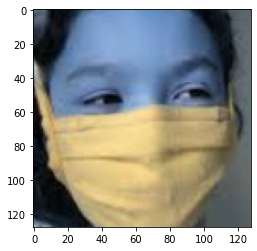

In [38]:
sample_mask_img = cv2.imread('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1565.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [39]:
model.save("face_mask.h5")


In [40]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier('../input/haarcascades/haarcascade_frontalface_default.xml')

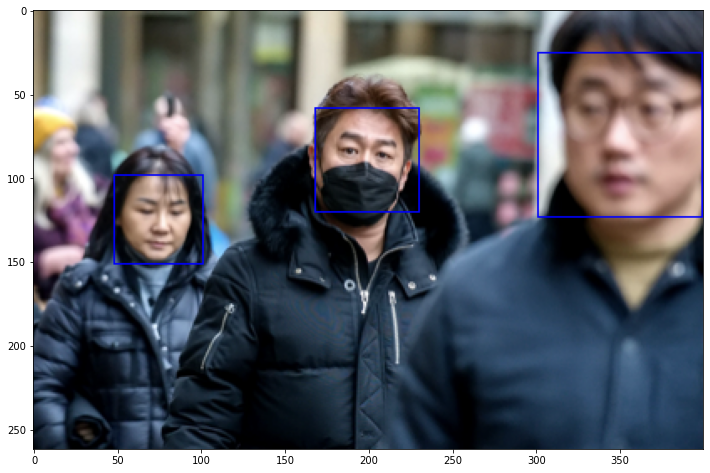

In [41]:
img = cv2.imread('../input/face-mask-detection/images/maksssksksss244.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.03, minNeighbors=6) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

### Social distance violation

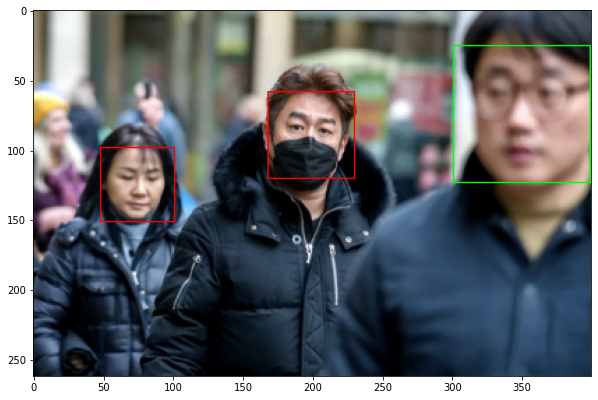

In [42]:
from scipy.spatial import distance

MIN_DISTANCE = 130

label = [0 for i in range(len(faces))]
for i in range(len(faces)-1):
    for j in range(i+1, len(faces)):
        dist = distance.euclidean(faces[i][:2],faces[j][:2])
        if dist<MIN_DISTANCE:
            label[i] = 1
            label[j] = 1
new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    if label[i]==1:
        cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
    else:
        cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
plt.figure(figsize=(10,10))
plt.imshow(new_img)


### Incorporating mask detection model with Haarcascades classifier

In [43]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

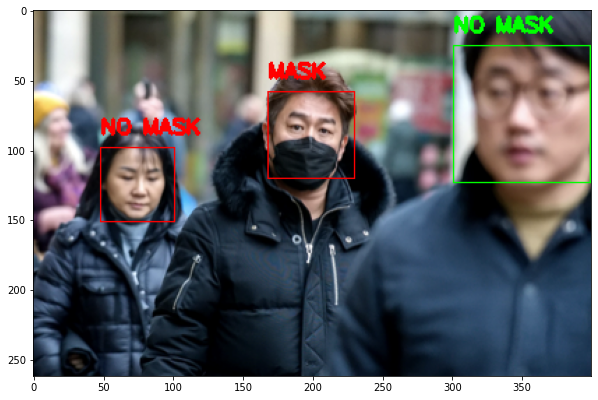

In [44]:
label = [0 for i in range(len(faces))]
for i in range(len(faces)-1):
    for j in range(i+1, len(faces)):
        dist = distance.euclidean(faces[i][:2],faces[j][:2])
        if dist<MIN_DISTANCE:
            label[i] = 1
            label[j] = 1
new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    crop = new_img[y:y+h,x:x+w]
    crop = cv2.resize(crop,(150,150))
    crop = np.reshape(crop,[1,150,150,3])/255.0
    mask_result = model.predict(crop)
    #mask_result = np.argmax(mask_result_x, axis=1)
    cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
    cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
plt.figure(figsize=(10,10))
plt.imshow(new_img)


    

In [46]:
# they have to detect how much person has wear mask and not wearing mask.
# in the not wearing they have to detect with the red lite and in the wearing the have to detect by the green light.
